<a href="https://colab.research.google.com/github/anupbagale/csv-data-to-image/blob/main/reconstruct_image_using_csvfile_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#importing different libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import csv

In [23]:
#definind the path of the image
image_path='/content/drive/MyDrive/image_processing_lab/leena_img.png'
image_data=cv2.imread(image_path)
print(image_data.shape)
#converting the image into gray scale
#3 channels --> 1 channel (gray scale)
image_gray=cv2.cvtColor(image_data,cv2.COLOR_BGR2GRAY)
print(image_gray.shape)

(512, 512, 3)
(512, 512)


In [24]:
#extracting the array of an image
image_array=np.array(image_gray)

#convert the array to dataframe
#dataframe --> 2-dimensional labeled data structure
# similar to a spreadsheet, have rows and columns
data_frame=pd.DataFrame(image_array)

#save the data frame to a csv file
#copy the path of the location where you want to save the csv file
data_frame_csv=data_frame.to_csv('/content/drive/MyDrive/csv_folder.csv', index= False)



In [25]:
#read the csv file
data_frame_read=pd.read_csv('/content/drive/MyDrive/csv_folder.csv')

#converting the csv file to numoy array
data_frame_array=data_frame_read.to_numpy()

#cv2.merge --> merge multiple arrays into a single multi-channel array
#without merging --> OpenCV will interpret each row in the array as a separate image.
reconstructed_image = cv2.merge([data_frame_array])


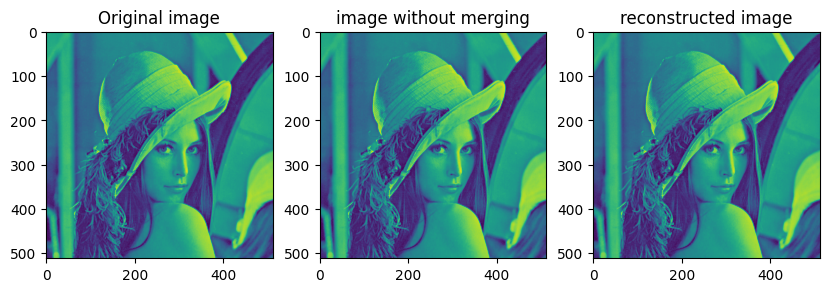

In [26]:
#display the image
plt.figure(figsize= (10,10))

plt.subplot(3,3,1)
plt.title('Original image')
plt.imshow(image_gray)

plt.subplot(3,3,2)
plt.title('image without merging')
plt.imshow(data_frame_array)

plt.subplot(3,3,3)
plt.title('reconstructed image')
plt.imshow(reconstructed_image)